# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

sns.set(rc={'figure.figsize':(20,10)})

In [27]:
# anos = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']
anos = ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012']
tam = 1000

for i, ano in enumerate(anos):
    if ano == '2020' or ano == '2019':
        tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';')
        # tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';', chunksize = tam)
    else:
        tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = '|')
        # tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_' + ano + '.csv', encoding = "ISO-8859-1", sep = '|', chunksize = tam)

    # for chunk in tabela:
    #     y = pd.DataFrame(chunk)
    #     break
    
    y = pd.DataFrame(tabela)
    print('Ano: ', ano, '\nTamanho tabela sem o processamento: ', y.shape)

    # Limpeza dados
    if 'CD_INEP_ALUNO' not in y.columns:
        y['CD_INEP_ALUNO'] = ''

    if 'Hora_Inicio' not in y.columns:
        y['Hora_Inicio'] = ''

    if 'DEF_AUTISMO' in y.columns:
        y = y.rename(columns={'DEF_AUTISMO': 'DEF__AUTISMO'})

    if 'DEF_SURDEZ_LEVE' in y.columns:
        y = y.rename(columns={'DEF_SURDEZ_LEVE': 'DEF__SURDEZ_LEVE'})

    if 'DEF_SURDEZ_SEV' in y.columns:
        y = y.rename(columns={'DEF_SURDEZ_SEV': 'DEF__SURDEZ_SEV'})

    if 'DEF_INTELECT' in y.columns:
        y = y.rename(columns={'DEF_INTELECT': 'DEF__INTELECT'})

    if 'DEF_MULTIPLA' in y.columns:
        y = y.rename(columns={'DEF_MULTIPLA': 'DEF__MULTIPLA'})

    if 'DEF_CEGUEIRA' in y.columns:
        y = y.rename(columns={'DEF_CEGUEIRA': 'DEF__CEGUEIRA'})

    if 'DEF_BAIXA_VISAO' in y.columns:
        y = y.rename(columns={'DEF_BAIXA_VISAO': 'DEF__BAIXA_VISAO'})

    if 'DEF_SURDO_CEG' in y.columns:
        y = y.rename(columns={'DEF_SURDO_CEG': 'DEF__SURDO_CEG'})

    if 'DEF_TRANST_DES_INF' in y.columns:
        y = y.rename(columns={'DEF_TRANST_DES_INF': 'DEF__TRANST_DES_INF'})

    if 'DEF_SINDR_ASPER' in y.columns:
        y = y.rename(columns={'DEF_SINDR_ASPER': 'DEF__SINDR_ASPER'})

    if 'DEF_SINDR_RETT' in y.columns:
        y = y.rename(columns={'DEF_SINDR_RETT': 'DEF__SINDR_RETT'})

    if 'DEF_FIS_N_CADEIR' in y.columns:
        y = y.rename(columns={'DEF_FIS_N_CADEIR': 'DEF__FIS_N_CADEIR'})

    if 'DEF_FIS_CADEIR' in y.columns:
        y = y.rename(columns={'DEF_FIS_CADEIR': 'DEF__FIS_CADEIR'})

    if 'DEF_N_POSSUI' in y.columns:
        y = y.rename(columns={'DEF_N_POSSUI': 'DEF__N_POSSUI'})

    labelsDeficiencia = ['NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
    
    for label in labelsDeficiencia:
        y[label] = pd.to_numeric(y[label], errors="coerce")

    if ano == '2020':
        for idadeReal in y['IDADE_ALUNO_ANO_CIVIL'].unique():
            y.loc[y['IDADE_ALUNO_ANO_CIVIL'] == idadeReal, 'IDADE_ALUNO_ANO_CIVIL'] = int(idadeReal.split(',')[0])
    else:
        y['IDADE_ALUNO_ANO_CIVIL'] = pd.to_numeric(y['IDADE_ALUNO_ANO_CIVIL'], errors="coerce")

    y['IDADE_ALUNO_ANO_CIVIL'] = pd.to_numeric(y['IDADE_ALUNO_ANO_CIVIL'], errors="coerce")

    y['[0-3]'] = 0
    y['[3-6]'] = 0
    y['[6-9]'] = 0
    y['[9-12]'] = 0
    y['[12-15]'] = 0
    y['[15-18]'] = 0
    y['[18+]'] = 0

    y.loc[y['IDADE_ALUNO_ANO_CIVIL'] <= 3, '[0-3]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 3) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 6), '[3-6]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 6) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 9), '[6-9]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 9) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 12), '[9-12]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 12) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 15), '[12-15]'] = 1
    y.loc[(y['IDADE_ALUNO_ANO_CIVIL'] > 15) & (y['IDADE_ALUNO_ANO_CIVIL'] <= 18), '[15-18]'] = 1
    y.loc[y['IDADE_ALUNO_ANO_CIVIL'] > 18, '[18+]'] = 1

    y.loc[y['DESC_CICLO_ENSINO'].isnull(), 'DESC_CICLO_ENSINO'] = 'NAO INFORMADO'

    y = y.drop_duplicates(subset='CD_ALUNO_SME')

    y = y.drop(columns=['DESC_TIPO_PROGRAMA', 'CD_INEP_ALUNO', 'CD_PARECER_CONCL_FIN', 'DESC_PARECER_CONCL_FIN', 'DESC_TIPO_PROGRAMA', 'Hora_Inicio', 'CD_UNIDADE_EDUCACAO', 'NOME_DISTRITO', 'CD_SETOR', 'TIPO_ESCOLA', 'DRE', 'CD_INEP_ESCOLA', 'SITUACAO_ESCOLA', 'DESC_TURNO', 'DESC_SERIE', 'MODALIDADE', 'MODALIDADE_SEGMENTO', 'TURMA_ESCOL', 'NOME_TURMA', 'HORA_IN_TURMA', 'HORA_FIM_TURMA', 'DESC_PERIODICIDADE_TURMA', 'DESC_ETAPA_ENSINO', 'DESC_CICLO_ENSINO', 'DESC_TIPO_TURMA', 'DESC_TIPO_PROGRAMA', 'DUR_DIA_TURMA', 'DUR_DIA_HORA', 'DUR_DIA_MIN', 'DUR_SEMAN_TURMA', 'DUR_SEM_HORA', 'DUR_SEM_MIN', 'QTD_DIAS_SEMAN_TURMA', 'X_SEMANA', 'SEG', 'TER', 'QUA', 'SEX', 'SAB', 'DOM', 'CD_INEP_ALUNO', 'DESC_RACA_COR', 'CD_PAIS_NASC', 'DESC_PAIS_NASC', 'CD_MUN_NASC', 'DESC_MUN_NASC', 'DESC_UF_NASC', 'ANO_SIT_MAT'])

    y = y.dropna(how="any", axis=0)
    
    print('Tamanho tabela com o processamento: ', y.shape, end='\n\n')

    if i == 0:
        y.to_csv('data/Matriculas.csv', sep=';', index=False, line_terminator='')
    else:
        y.to_csv('data/Matriculas.csv', sep=';', index=False, line_terminator='', mode='a', header=False)

Ano:  2019 
Tamanho tabela sem o processamento:  (1809796, 95)
Tamanho tabela com o processamento:  (1269282, 59)

Ano:  2018 
Tamanho tabela sem o processamento:  (1756527, 95)
Tamanho tabela com o processamento:  (1262767, 59)



C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (20,22,24,28,95) have mixed types.Specify dtype option on import or set low_memory=False.



Ano:  2017 
Tamanho tabela sem o processamento:  (1722560, 96)
Tamanho tabela com o processamento:  (1203139, 59)



C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.



Ano:  2016 
Tamanho tabela sem o processamento:  (1651243, 96)
Tamanho tabela com o processamento:  (1181535, 59)

Ano:  2015 
Tamanho tabela sem o processamento:  (1588623, 96)
Tamanho tabela com o processamento:  (1135913, 59)



C:\ferramentass\Python3.9\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (28,32) have mixed types.Specify dtype option on import or set low_memory=False.



Ano:  2014 
Tamanho tabela sem o processamento:  (1496726, 96)
Tamanho tabela com o processamento:  (1108512, 59)

Ano:  2013 
Tamanho tabela sem o processamento:  (1937973, 96)
Tamanho tabela com o processamento:  (1121412, 59)

Ano:  2012 
Tamanho tabela sem o processamento:  (1959572, 96)
Tamanho tabela com o processamento:  (1122511, 59)



In [28]:
tabela = pd.read_csv('data/Matriculas.csv', encoding = "ISO-8859-1", sep = ';')
y = pd.DataFrame(tabela)
print('Tamanho tabela: ', y.shape)

Tamanho tabela:  (9405071, 59)


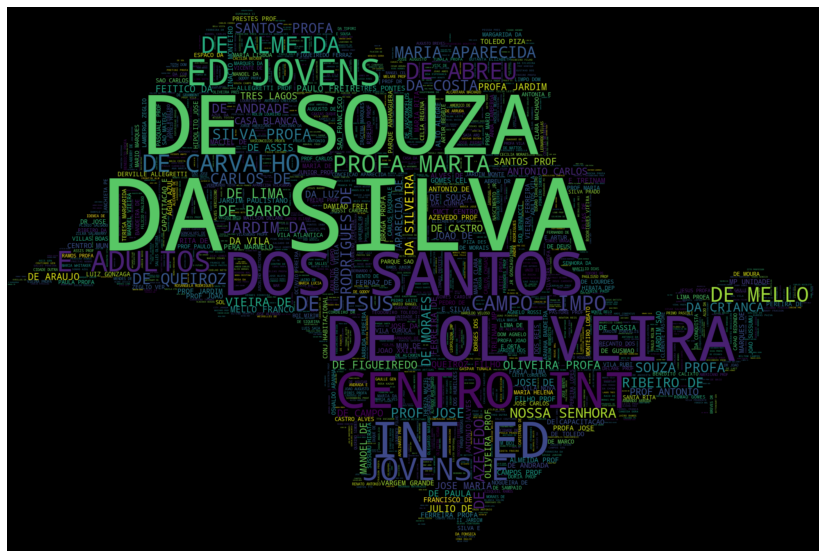

In [29]:
mask = np.array(Image.open('img/sp.png'))

def saveImage(text, ano, width=1980, height=1080):
    wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
    wc.generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    wc.to_file('wordcloud_' + ano + '.png')

saveImage(' '.join(y['NOME_ESCOLA'].to_list()), 'geral')

In [30]:
situacao = pd.DataFrame(columns=['Situacao', 'Quantidade'])

columns = ['SIT_AL_APROV', 'SIT_AL_REPROV', 'SIT_AL_ABAND', 'SIT_AL_CONCL', 'SIT_AL_TRANSF', 'SIT_AL_FALEC', 'SIT_AL_NCOM', 'SIT_AL_EXCL', 'SIT_AL_CES', 'SIT_AL_REMAN', 'SIT_AL_RECLAS', 'SIT_AL_ATIVO']
labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']

for idx, label in enumerate(labels):
    situacao.loc[idx] = list([label, np.sum(y[columns[idx]])])

fig = go.Figure(data=[go.Pie(labels=situacao['Situacao'], values=situacao['Quantidade'], hole=.3)])
fig.update_layout(title='Donut Plot da situação do aluno')
fig.show()

In [31]:
columns = ['AN_LETIVO', 'SIT_AL_APROV', 'SIT_AL_REPROV', 'SIT_AL_ABAND', 'SIT_AL_CONCL', 'SIT_AL_TRANSF', 'SIT_AL_FALEC', 'SIT_AL_NCOM', 'SIT_AL_EXCL', 'SIT_AL_CES', 'SIT_AL_REMAN', 'SIT_AL_RECLAS', 'SIT_AL_ATIVO']
labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']

df = pd.DataFrame(columns=columns)

df['AN_LETIVO'] = y['AN_LETIVO'].unique()

for column in columns[1:]:
    df[column] = list([np.sum(y.loc[y['AN_LETIVO'] == 2019][column]), np.sum(y.loc[y['AN_LETIVO'] == 2018][column]), np.sum(y.loc[y['AN_LETIVO'] == 2017][column]), np.sum(y.loc[y['AN_LETIVO'] == 2016][column]), np.sum(y.loc[y['AN_LETIVO'] == 2015][column]), np.sum(y.loc[y['AN_LETIVO'] == 2014][column]), np.sum(y.loc[y['AN_LETIVO'] == 2013][column]), np.sum(y.loc[y['AN_LETIVO'] == 2012][column])])

fig = go.Figure()
fig.update_layout(title='Line Chart da situação dos alunos pelos anos')
for i, column in enumerate(columns[1:]):
    fig.add_trace(go.Scatter(x=df["AN_LETIVO"], y=df[column], name=labels[i],
                        text=labels[i],
                        hoverinfo='text+y',
                        line_shape='linear'))
fig.show()


In [32]:
columns = ['AN_LETIVO', 'NEE_ALT_HAB', 'DEF__AUTISMO', 'DEF__SURDEZ_LEVE', 'DEF__SURDEZ_SEV', 'DEF__INTELECT', 'DEF__MULTIPLA', 'DEF__CEGUEIRA', 'DEF__BAIXA_VISAO', 'DEF__SURDO_CEG', 'DEF__TRANST_DES_INF', 'DEF__SINDR_ASPER', 'DEF__SINDR_RETT', 'DEF__FIS_N_CADEIR', 'DEF__FIS_CADEIR', 'DEF__N_POSSUI']
labels = ['Superdotação', 'Autismo', 'Surdez leve', 'Surdez severa', 'Interlectual', 'Multipla', 'Cegueira', 'Baixa visão', 'Surdo Cegueira', 'Transtorno degenerativo', 'Aspeger', 'Rett', 'Fisica não cadeirante', 'Fisica cadeirante', 'Sem deficiencia']

df = pd.DataFrame(columns=columns)

df['AN_LETIVO'] = y['AN_LETIVO'].unique()

for column in columns[1:]:
    df[column] = list([np.sum(y.loc[y['AN_LETIVO'] == 2019][column]), np.sum(y.loc[y['AN_LETIVO'] == 2018][column]), np.sum(y.loc[y['AN_LETIVO'] == 2017][column]), np.sum(y.loc[y['AN_LETIVO'] == 2016][column]), np.sum(y.loc[y['AN_LETIVO'] == 2015][column]), np.sum(y.loc[y['AN_LETIVO'] == 2014][column]), np.sum(y.loc[y['AN_LETIVO'] == 2013][column]), np.sum(y.loc[y['AN_LETIVO'] == 2012][column])])

fig = go.Figure()
fig.update_layout(title='Line Chart das deficiências dos alunos pelos anos')
for i, column in enumerate(columns[1:]):
    fig.add_trace(go.Scatter(x=df["AN_LETIVO"], y=df[column], name=labels[i],
                        text=labels[i],
                        hoverinfo='text+y',
                        line_shape='linear'))
fig.show()


[Text(0.5, 0, 'Alunos'),
 Text(0, 0.5, 'Idade'),
 Text(0.5, 1.0, 'Idade dos alunos por sexo')]

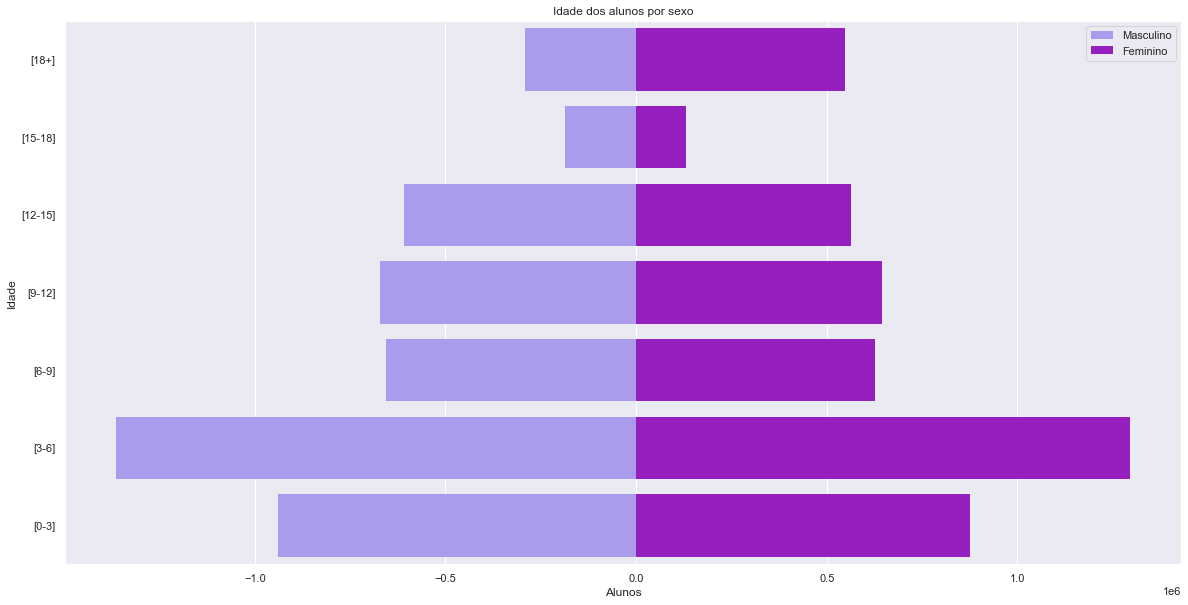

In [33]:
df = pd.DataFrame({
    'Idade': ['[0-3]', '[3-6]', '[6-9]', '[9-12]', '[12-15]', '[15-18]', '[18+]'],
    'Masculino': [np.sum(y.loc[y['CD_SEXO'] == 'M']['[0-3]']) * -1, np.sum(y.loc[y['CD_SEXO'] == 'M']['[3-6]']) * -1, np.sum(y.loc[y['CD_SEXO'] == 'M']['[6-9]']) * -1, np.sum(y.loc[y['CD_SEXO'] == 'M']['[9-12]']) * -1, np.sum(y.loc[y['CD_SEXO'] == 'M']['[12-15]']) * -1, np.sum(y.loc[y['CD_SEXO'] == 'M']['[15-18]']) * -1, np.sum(y.loc[y['CD_SEXO'] == 'M']['[18+]']) * -1],
    'Feminino': [np.sum(y.loc[y['CD_SEXO'] == 'F']['[0-3]']), np.sum(y.loc[y['CD_SEXO'] == 'F']['[3-6]']), np.sum(y.loc[y['CD_SEXO'] == 'F']['[6-9]']), np.sum(y.loc[y['CD_SEXO'] == 'F']['[9-12]']), np.sum(y.loc[y['CD_SEXO'] == 'F']['[12-15]']), np.sum(y.loc[y['CD_SEXO'] == 'F']['[15-18]']), np.sum(y.loc[y['CD_SEXO'] == 'F']['[18+]'])]
})

AgeClass = ['[18+]', '[15-18]', '[12-15]', '[9-12]', '[6-9]', '[3-6]', '[0-3]']

bar_plot = sns.barplot(x='Masculino', y='Idade', data=df, order=AgeClass, lw=0, label='Masculino', color='#A18DFA')
bar_plot = sns.barplot(x='Feminino', y='Idade', data=df, order=AgeClass, lw=0, label='Feminino', color='#A304DB')
bar_plot.legend()
bar_plot.set(xlabel="Alunos", ylabel="Idade", title = "Idade dos alunos por sexo")

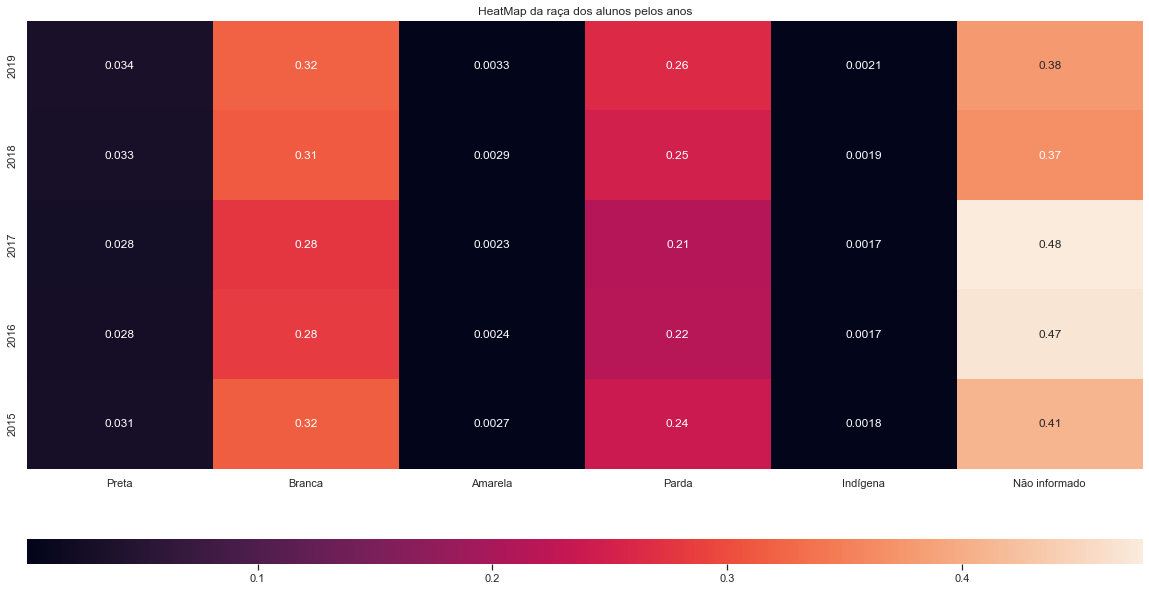

In [34]:
dfhm = pd.DataFrame([\
    [y.loc[y['AN_LETIVO'] == 2019]['CD_RACA_COR'].value_counts(normalize=True)[2], y.loc[y['AN_LETIVO'] == 2019]['CD_RACA_COR'].value_counts(normalize=True)[1], y.loc[y['AN_LETIVO'] == 2019]['CD_RACA_COR'].value_counts(normalize=True)[4], y.loc[y['AN_LETIVO'] == 2019]['CD_RACA_COR'].value_counts(normalize=True)[3], y.loc[y['AN_LETIVO'] == 2019]['CD_RACA_COR'].value_counts(normalize=True)[5], y.loc[y['AN_LETIVO'] == 2019]['CD_RACA_COR'].value_counts(normalize=True)[6]],\
    [y.loc[y['AN_LETIVO'] == 2018]['CD_RACA_COR'].value_counts(normalize=True)[2], y.loc[y['AN_LETIVO'] == 2018]['CD_RACA_COR'].value_counts(normalize=True)[1], y.loc[y['AN_LETIVO'] == 2018]['CD_RACA_COR'].value_counts(normalize=True)[4], y.loc[y['AN_LETIVO'] == 2018]['CD_RACA_COR'].value_counts(normalize=True)[3], y.loc[y['AN_LETIVO'] == 2018]['CD_RACA_COR'].value_counts(normalize=True)[5], y.loc[y['AN_LETIVO'] == 2018]['CD_RACA_COR'].value_counts(normalize=True)[6]],\
    [y.loc[y['AN_LETIVO'] == 2017]['CD_RACA_COR'].value_counts(normalize=True)[2], y.loc[y['AN_LETIVO'] == 2017]['CD_RACA_COR'].value_counts(normalize=True)[1], y.loc[y['AN_LETIVO'] == 2017]['CD_RACA_COR'].value_counts(normalize=True)[4], y.loc[y['AN_LETIVO'] == 2017]['CD_RACA_COR'].value_counts(normalize=True)[3], y.loc[y['AN_LETIVO'] == 2017]['CD_RACA_COR'].value_counts(normalize=True)[5], y.loc[y['AN_LETIVO'] == 2017]['CD_RACA_COR'].value_counts(normalize=True)[6]],\
    [y.loc[y['AN_LETIVO'] == 2016]['CD_RACA_COR'].value_counts(normalize=True)[2], y.loc[y['AN_LETIVO'] == 2016]['CD_RACA_COR'].value_counts(normalize=True)[1], y.loc[y['AN_LETIVO'] == 2016]['CD_RACA_COR'].value_counts(normalize=True)[4], y.loc[y['AN_LETIVO'] == 2016]['CD_RACA_COR'].value_counts(normalize=True)[3], y.loc[y['AN_LETIVO'] == 2016]['CD_RACA_COR'].value_counts(normalize=True)[5], y.loc[y['AN_LETIVO'] == 2016]['CD_RACA_COR'].value_counts(normalize=True)[6]],\
    [y.loc[y['AN_LETIVO'] == 2015]['CD_RACA_COR'].value_counts(normalize=True)[2], y.loc[y['AN_LETIVO'] == 2015]['CD_RACA_COR'].value_counts(normalize=True)[1], y.loc[y['AN_LETIVO'] == 2015]['CD_RACA_COR'].value_counts(normalize=True)[4], y.loc[y['AN_LETIVO'] == 2015]['CD_RACA_COR'].value_counts(normalize=True)[3], y.loc[y['AN_LETIVO'] == 2015]['CD_RACA_COR'].value_counts(normalize=True)[5], y.loc[y['AN_LETIVO'] == 2015]['CD_RACA_COR'].value_counts(normalize=True)[6]]\
    ],\
    columns=['Preta', 'Branca', 'Amarela', 'Parda','Indígena', 'Não informado'])

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(dfhm, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=['2019', '2018', '2017', '2016', '2015'],
                 annot=True)
ax.set_title('HeatMap da raça dos alunos pelos anos')
plt.show()